0.7690196904160957


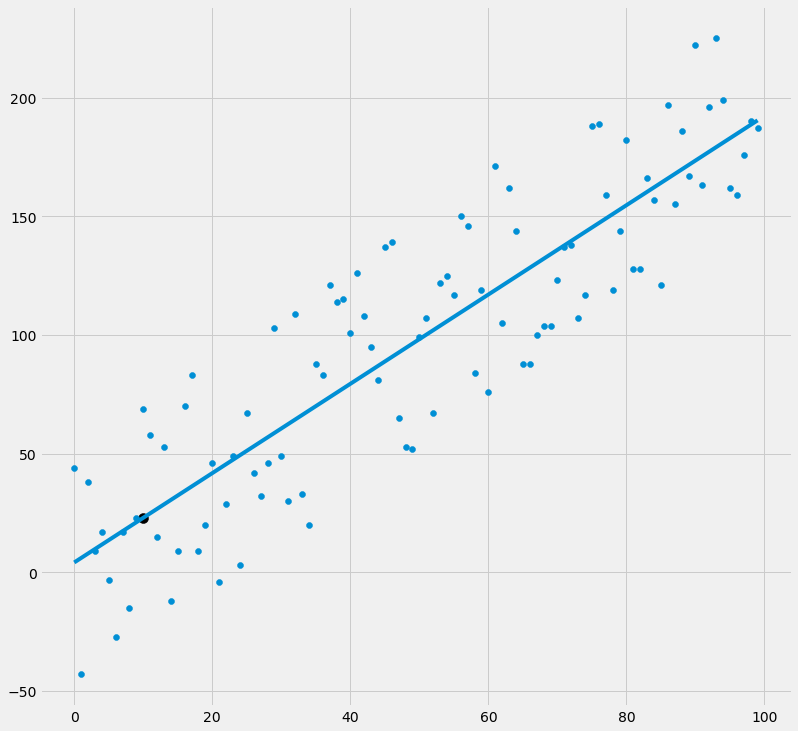

In [103]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import style
style.use('fivethirtyeight')
fig = plt.figure(figsize = (12,12))
def test_data(size, var, step = 2, corr = False):
    initial = 1
    y = []
    x = []
    for i in range(size):
        y_value = initial + random.randrange(-var, +var)
        y.append(y_value)
        if corr and corr == 'pos':
            initial+=step
        elif corr and corr == 'neg':
            initial-=step
    for i in range(len(y)):
        x.append(i)
    return np.array(x, dtype = np.float64), np.array(y, dtype = np.float64) 
def best_fit_parameters(x,y):
    p = (mean(x)*mean(y))-mean(x*y)
    q = (mean(x)*mean(x))-mean(x*x)
    m = p/q 
    b = mean(y)-(m*mean(x))
    return m,b
x, y = test_data(100, 50, 2, corr = 'pos')
m,b = best_fit_parameters(x,y)
best_fit_line = [(m*X)+b for X in x]
forecast_x = 10
forecast_y = (m*forecast_x)+b
def coefficient_of_determination(y_input, y_bestfit):
    squared_error_line = np.sum((y_input-y_bestfit)**2)
    squared_error_mean = np.sum((y_input-mean(y_input))**2)
    r_square = 1-(squared_error_line/squared_error_mean)
    return r_square
r = coefficient_of_determination(y, best_fit_line)
print(r)
plt.scatter(forecast_x, forecast_y, c = 'k', s = 100)
plt.scatter(x,y)
plt.plot(x, best_fit_line)
plt.show()

0.6073652246113413
